### Imports

In [87]:
from src.methods import (SafeLevelSmote,BorderlineSMOTE,OneSidedSelection)
from src.c45 import C45
import pandas as pd
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import  numpy as np


### Calculate performance metrics based on C4.5 classification

In [88]:
def score_data(x: np.array, y: np.array, cv=5) -> pd.DataFrame:
	clf = C45()
	y_pred = cross_val_predict(clf, x, y, cv=cv)
	return pd.DataFrame(classification_report(y,y_pred,output_dict=True))

In [89]:
def visualize_points(X, y) -> None:
	c =['tab:orange' if i ==1 else "tab:blue" for i in y]
	plt.scatter(X[:, 0], X[:, 1], c=c)
	plt.show()

### Datasets

#### Dummy dataset

Counter({0: 990, 1: 10})


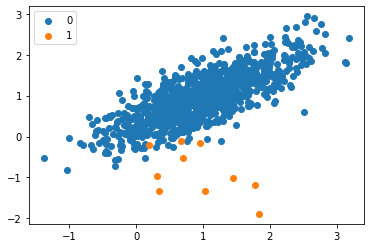

In [90]:
dummy_X, dummy_y = make_classification(n_samples=1000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
counter = Counter(dummy_y)
print(counter)
for label, _ in counter.items():
	row_ix = np.where(dummy_y == label)[0]
	plt.scatter(dummy_X[row_ix, 0], dummy_X[row_ix, 1], label=str(label))
plt.legend()
plt.show()

##### Base performance

In [91]:
base_scores_dummy = score_data(dummy_X, dummy_y)
display(base_scores_dummy)

,0,1,accuracy,macro avg,weighted avg
precision,0.995964,0.666667,0.993,0.831315,0.992671
recall,0.996970,0.600000,0.993,0.798485,0.993000
f1-score,0.996466,0.631579,0.993,0.814023,0.992818
support,990.000000,10.000000,0.993,1000.000000,1000.000000


#### Satimage

In [92]:
satimage_df = pd.read_csv('datasets/satimage.csv')
satimage = satimage_df.to_numpy()
satimage_X,satimage_y =satimage[:,:-1],satimage[:,-1]
satimage_y = np.where(satimage_y==4.0,1.0,0.0)

##### Base performance

In [93]:
base_scores_satimage = score_data(satimage_X, satimage_y)
display(base_scores_satimage)

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.952067,0.519345,0.906843,0.735706,0.910006
recall,0.944358,0.558400,0.906843,0.751379,0.906843
f1-score,0.948197,0.538165,0.906843,0.743181,0.908341
support,5805.000000,625.000000,0.906843,6430.000000,6430.000000


### Compare performance of methods

In [100]:
def report(strategy, X, y, base_scores,visualize=False):
	X_resampled,y_resampled = strategy.fit_resample(X, y)
	resampled_scores_dummy = score_data(X_resampled,y_resampled)
	difference = (resampled_scores_dummy-base_scores).round(3)
	display(difference)
	if visualize:
		visualize_points(X_resampled,y_resampled)

#### BorderlineSMOTE

##### Dummy dataset

(1000, 2) (1012, 2)


,0,1,accuracy,macro avg,weighted avg
precision,-0.002,0.061,-0.005,0.029,-0.005
recall,-0.003,0.127,-0.005,0.062,-0.005
f1-score,-0.003,0.096,-0.005,0.047,-0.005
support,0.000,12.000,-0.005,12.000,12.000


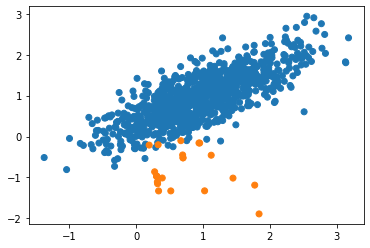

In [99]:
report(BorderlineSMOTE(),dummy_X, dummy_y,base_scores_dummy,True)

##### Satimage

In [96]:
report(BorderlineSMOTE(),satimage_X, satimage_y,base_scores_satimage)

KeyboardInterrupt: 

#### OneSidedSelection

##### Dummy dataset

In [ ]:
report(OneSidedSelection(),dummy_X, dummy_y,base_scores_dummy,True)

##### Satimage

In [ ]:
report(OneSidedSelection(),satimage_X, satimage_y,base_scores_satimage)